# Everything Counts Assignment 2

The Github repository is available at: https://github.com/fraserdeans/lis-everything-counts-2

## Introduction



Nature connection is "the subjective sense of the cognitive, affective and experiential relationship that people have with nature" (Liu et al. 2022). Researchers have been investigating the impact of nature connection on a variety of areas including wellbeing, happiness and attitudes towards climate change and environmental concern.

Existing literature provides evidence that levels of nature connection correlates with biological traits (e.g. sex) and may be affected by intentional practices (e.g. noticing nature). This paper will test claims using a dataset sourced from Pocock et al. (2022).

## The dataset

The dataset was collected via an experiment investigating how various nature-based activities effect people's feelings of connectedness. The dataset also includes participants feelings of wellbeing, health and attitudes towards nature conservation as well as other variables.

Study participants were recruited through social and print media. 1295 participants were recruited in total. 500 of those completed the full survey.

During the experiments, researchers assigned participants to one of six groups. Each group were asked to complete a different activity (10 minutes) five times over the next eight days. The activities included: 

1) Counting pollinators.
2) Surveying butterflies.
3) Notice three good things in nature.
4) Same as group 1 and also notice three good things in nature.
5) Same as group 2 and also notice three good things in nature. 
6) A control group who were told to wait until they were contacted again.


The dataset includes:

1) The survey data for all participants.
2) The post-participation survey data for 500 participants that met the full inclusion criteria: either thye took part in their assigned activies at least once or were in the wait-list control group.

The full dataset includes 66 variables. Our hypothesis testing relies on a subset of these variables. They are listed below:

| Variable                                      | Description                                                                              | Type                     |
|-----------------------------------------------|------------------------------------------------------------------------------------------|--------------------------|
| Participant                                   | Indicates full participation status, 0 = not met, 1 = met.                               | Categorical Nominal      |
| NR6sum_pre                                    | Sum of six components of Nature Relatedness scale, pre-survey.                           | Numerical Discrete       |
| NR6sum_post                                   | Sum of six components of Nature Relatedness scale, post-survey.                          | Numerical Discrete       |
| PROCOBS_pre                                   | Pre-survey score of overall conservation behaviors.                                      | Numerical Discrete       |
| PROCOBS_post                                  | Post-survey score of overall conservation behaviors.                                     | Numerical Discrete       |
| Health_pre                                    | Pre-survey self-rated health score (1 to 5).                                             | Categorical Ordinal      |
| Health_post                                   | Post-survey self-rated health score (1 to 5).                                            | Categorical Ordinal      |
| Age                                           | Age of respondent in years.                                                              | Numerical Discrete       |
| Sex                                           | Sex selected by respondent.                                                              | Categorical Nominal      |
| spendtimeoutsideatleastafewtimesperweek       | Frequency of time spent outside in a typical week.                                       | Categorical Nominal      |
| condition                                     | Assigned group for the study.                                                            | Categorical Nominal      |
| conditiontext                                 | Description of the assigned group.                                                       | Categorical Nominal      |
| conditiontypetext                             | Recoded grouping of study condition.                                                     | Categorical Nominal      |
| Engagementwiththetask                         | Level of engagement with the task.                                                       | Categorical Ordinal      |
| Timespentoutsideduringthetask                 | Amount of time spent outside during the task.                                            | Categorical Ordinal      |


### Loading the dataset

In [30]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

df = pd.read_csv("./data/natureupclose_data.csv", encoding='ISO-8859-1')

### Cleaning the dataset

Variables that are not needed for the hypothesis testing are removed. These include open ended text answers, location data and emotion based survey responses.

In [31]:
df.drop(columns=['LineSurvey1', 'ResponseIDSurvey1', 'DateSurvey1',
       'LineSurvey2', 'ResponseIDSurvey2', 'DateSurvey2', 'PROCOBScivilaction_pre', 'PROCOBSgarden_pre',
       'PROCOBScivilaction_post', 'PROCOBSgarden_post', 'SatisfiedWithLife_pre', 'SatisfiedWithLife_post', 'WorthwhileLife_pre', 'WorthwhileLife_post',
       'PROCOBS_post', 'Health_post', 'Age_comments', 'Ethnicgroup',
       'postcode',
       'Ifeltclosetonaturethroughmysenses', 'Ifoundtakingpartcalmingorjoyful',
       'Inoticedthebeautyofnaturewhilsttakingpart',
       'Ifoundtakingpartmeaningful', 'Ifeltiwashelpingtotakecareofnature',
       'Ifoundtakingpartfrustrating',
       'Howmanytimesdidyoudotheactivities', 'Openquestionanswers',
       'Whatyoulikedabouttakingpart', 'liketheme_noticingnature',
       'liketheme_intrinsicbenefits', 'liketheme_contributing',
       'liketheme_learning', 'liketheme_socialconnections', 'liketheme_other',
       'Whatyoudidntlikeabouttakingpart', 'disliketheme_weather',
       'disliketheme_lackoftime', 'disliketheme_complexity',
       'disliketheme_technology', 'disliketheme_lackofsuccess',
       'disliketheme_interferedwithnatureengagement', 'disliketheme_nothing',
       'disliketheme_other', 'Median_IMD_postcodedistrict',
       'Mean_IMD_postcodedistrict', 'latitude', 'longitude'], inplace=True)

### Bias in the data

The dataset was collected during an experiment. Participant recruitment techniques and sources could have biased the data. 

## Hypothesis 1

Hughes et al. (2019) found a difference in levels of nature connection between males and females. Females reported higher levels of nature connection. The dataset will be tested to see if the data is consistent with these observations.

The variable `NR6sum_pre` is a sum of six components of Nature Relatedness scale taken in the pre-survey. This provides an indicator of a participants nature connectedness pre-intervention.

The hypothesis:

$H_0$: There is no difference in the variable `NR6sum_pre` between male participants and female participants.

$H_A$: The variable `NR6sum_pre` is higher for female participants than male participants.


### Testing

Examining the values of the 'Sex' variable in the dataset shows a number of different values. 

In [32]:
df['Sex'].value_counts() 

Sex
Female                 1042
Male                    238
Prefer not to say         9
Other                     5
Other, please state       1
Name: count, dtype: int64

As the dataset contains more values than `Male` and `Female` in the `Sex` column, only observations of `Male` and `Female` will be selected because this is the hypothesis based on Hughes et al. (2019).

In [33]:
# Select only observations with values of 'Male' or 'Female'
df_male_and_female = df[df['Sex'].isin(['Male', 'Female'])]

By plotting the `NR6sum_pre` against the `Sex` variable (shown below in Fig 1) the data shows a wider range of values for nature-connectedness in males than females. The mean value for female participants is higher than male participants. However, the highest value for nature-connectedness is a male participant.

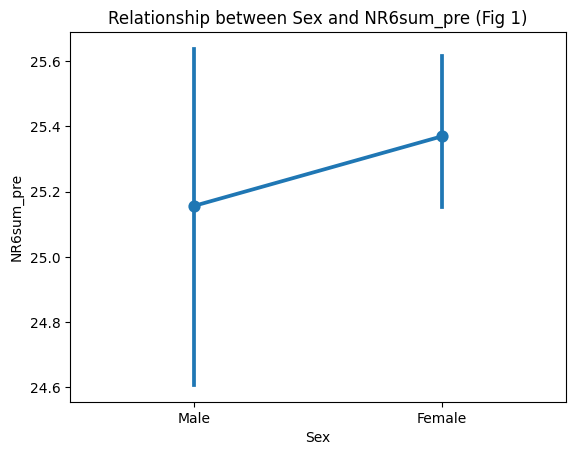

In [34]:
sns.pointplot(x = 'Sex', y = 'NR6sum_pre', data = df_male_and_female)
plt.title('Relationship between Sex and NR6sum_pre (Fig 1)')
plt.show()

The plot above suggests that the alternate hypothesis is true. The mean of the female group is greater than the male group.  

Running a T-Test on the data will show us if this observation is reliable or could it be due to random chance in the dataset. It will be run one-sided due to our alternate hypothesis that the female group has a higher `NR6sum_pre` score than the male group.

In [35]:
import scipy.stats as stats
import numpy as np

# Create separate male and female groups and remove any missing values
males = df_male_and_female[df_male_and_female['Sex'] == 'Male']['NR6sum_pre'].dropna()
females = df_male_and_female[df_male_and_female['Sex'] == 'Female']['NR6sum_pre'].dropna()

# Complete a one-sided T-Test on the groups
t_stat, p_value = stats.ttest_ind(females, males, alternative='greater')
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: 0.7669674706793618, p-value: 0.2216213121939779


### Interpreting the data

The p-value of the T-test is `0.2216213121939779`. The null hypothesis cannot be rejected. We cannot be sure that our observation is not due to random chance in the dataset. 

Furthermore, this is in contrast to the observations of Hughes et al. (2019).

## Hypothesis 2

Richardson et al. (2021) suggest that the activity of intentionally noticing nature explains higher levels of nature connectedness. 

Our dataset contains data from an experiment where participants were asked to complete different activities in nature environments. 

The `NR6sum_pre` and `NR6sum_post` variables of our dataset are an indicator of nature connectedness. 

The hypothesis:

$H_0$: There is no mean change between `NR6sum_pre` and `NR6sum_post` for participants that notice nature.

$H_A$: The mean change between `NR6sum_pre` and `NR6sum_post` is different for participants that notice nature than participants that don't.

### Testing

The `NR6sum_post` variable will only be valid for participants that met the inclusion criteria in the experiment our data is taken from. Participants that didn't meet this critera will be excluded from our testing.

The dataset includes additional activities that were part of the experiment.

In [36]:
df['conditiontypetext'].value_counts()

conditiontypetext
combined          433
citsci            430
control           216
noticingnature    216
Name: count, dtype: int64

Remove the observations that were part of the additional activities. The control group did not engage in noticing nature activities.

In [37]:
# Include only the control group and noticing nature groups
df_h2 = df[df['conditiontypetext'].isin(['control', 'noticingnature'])]

# Calculating the difference in NR6sum values between pre- and post-survey
df_h2['NR6sum_diff'] = df_h2['NR6sum_post'] - df_h2['NR6sum_pre']

In [38]:
# Include only participants that completed all the critera
df_h2 = df_h2[ df_h2['Participant'] == 1 ]

In [39]:
# Separate the two groups
control_group = df_h2[ df_h2['conditiontypetext'] == 'control' ]['NR6sum_diff']
noticing_nature_group = df_h2[ df_h2['conditiontypetext'] == 'noticingnature' ]['NR6sum_diff']

The plot below (Fig 2) shows the data of the two groups. It clearly shows the noticing nature group with a higher mean NR6sum_diff score than the control group. This indicates a higher level of nature connection from doing the noticing nature activity. The ranges of both groups are similar. The lowest point of the noticing nature group is higher than the highest control group observation. Indicating that even the smallest increase in nature connectedness in the noticing nature group was greater than the largest increase in the control group. This finding is inline with the alternate hypothesis.

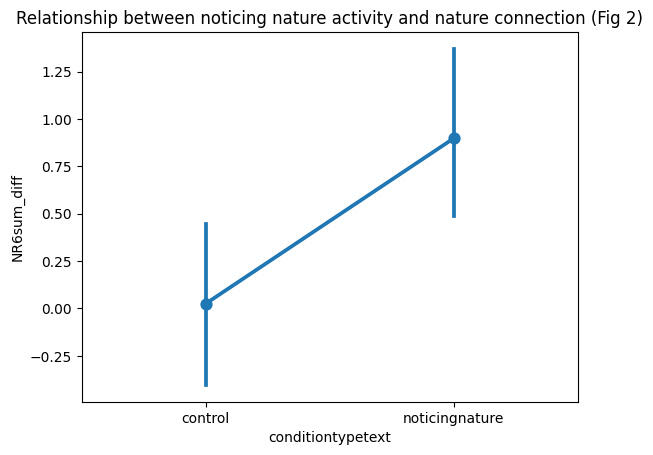

In [40]:
# Plot the two groups NR6sum_diff data against each other 
sns.pointplot(x = 'conditiontypetext', y = 'NR6sum_diff', data = df_h2)
plt.title('Relationship between noticing nature activity and nature connection (Fig 2)')
plt.show()

Running a T-Test on the data will determine if our finding is significant enough to reject the null hypothesis or could it be due to random chance in the dataset.

In [41]:
# Complete a T-Test on the groups
t_stat, p_value = stats.ttest_ind(noticing_nature_group, control_group)
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: 2.8794200300533577, p-value: 0.004368466519549251


### Interpreting the data

The p-value is `0.004368466519549251` and less than 0.05 the null hypothesis is rejected.

These data support the findings by Richardson et al. (2021).

## Hypothesis 3

The PROCOBS_pre variable within this dataset represents the Pro-Nature Conservation Scale (ProCoBS). The ProCoBS scale measures an individual's conservation behaviours. Richardson (2020) found a equally positive correlation between (1) ProCoBS and nature connection and (2) pro-environmental behaviours and nature connection of about 0.6. 

Although ProCoBS is different from pro-environmental behaviours, both have overlapping elements (Barbett et al, 2020).

Could it be possible that factors that affect pro-environmental behaviours also affect pro-nature conservation behaviour?

Gifford et al. (2014) outline many factors that affect pro-environmental behaviour. Factors include age, gender and engaging in personal health care activities. 

Their literature review found evidence that older people are more likely to engage in pro-environmental behaviour, women are more likely than men to engage in pro-environmental behaviour and engaging in personal health care activities also increases likelihood of engaging in pro-environmental behaviour. 

Our dataset includes variables related to these factors: `Sex`, `Age`, `Health_pre`. 

The hypothesis:

$H_0$: Age, sex and health do not affect pro-nature conservation behaviour.

$H_A$: Age, sex and health do affect pro-nature conservation behaviour.


### The predictors

The graphs below show how the selected variables correlate with pro-nature conservation behaviour.

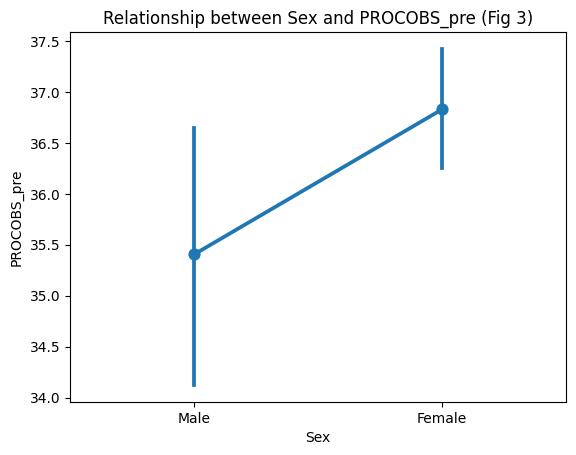

In [52]:
# Select only observations with values of 'Male' or 'Female'
h3_df = df[df['Sex'].isin(['Male', 'Female'])]

sns.pointplot(x = 'Sex', y = 'PROCOBS_pre', data = h3_df)
plt.title('Relationship between Sex and PROCOBS_pre (Fig 3)')
plt.show()

Fig 3 shows that female participants have a higher PROCOBS_pre score than the other groups. Indicating a positive influence.

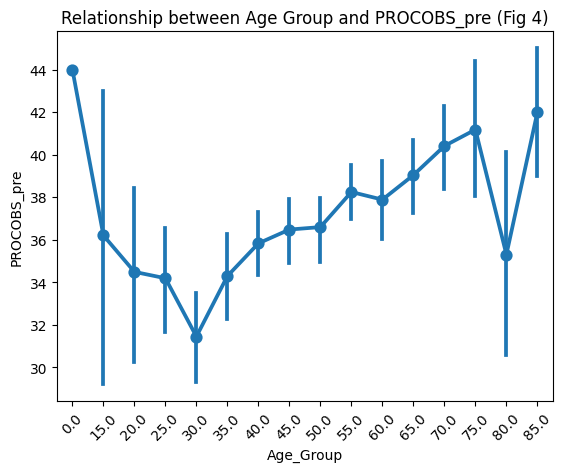

In [50]:
h3_df['Age_Group'] = (h3_df['Age'] // 5) * 5

# Now, use 'Age_Group' for the x-axis in your pointplot
sns.pointplot(x='Age_Group', y='PROCOBS_pre', data=h3_df)
plt.title('Relationship between Age Group and PROCOBS_pre (Fig 4)')
plt.xticks(rotation=45)
plt.show()

Fig 4 shows that from between age 25 to 75, older age groups have a higer PROCOBS_pre score. Indicating a positive influence. The trend is less clear on groups outside of that range.

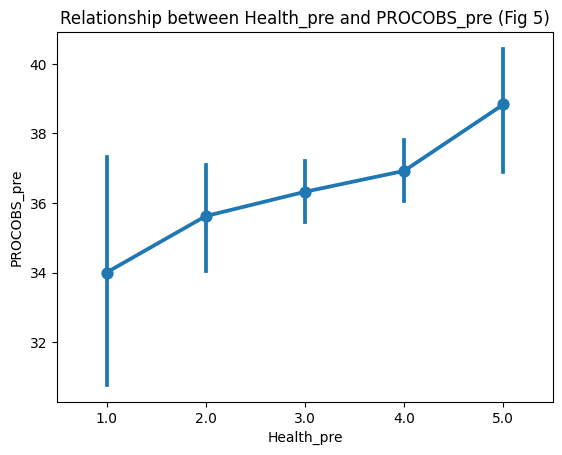

In [49]:
sns.pointplot(x = 'Health_pre', y = 'PROCOBS_pre', data = h3_df)
plt.title('Relationship between Health_pre and PROCOBS_pre (Fig 5)')
plt.show()

Fig 5 shows participants with improved health have a higher PROCOBS_pre score. Indicating a positive influence of health.

### The model

The hypothesis suggests that multiple predictors (age, sex and health) effect one response (ProCoBS). Linear regression with multiple predictors is used to determined the influence of these predictors.

In [53]:
m_full = sm.formula.ols(formula = 'PROCOBS_pre ~  Age + Health_pre + Sex', data = h3_df)

multi_reg = m_full.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:            PROCOBS_pre   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     24.98
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           1.19e-15
Time:                        22:10:47   Log-Likelihood:                -4100.2
No. Observations:                1131   AIC:                             8208.
Df Residuals:                    1127   BIC:                             8229.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      25.9665      1.406     18.472      

### Interpreting the model

The predictors of sex (male), age, health_pre are significant and have p-values lower than 0.05. The additional sex variables are not significant predictors. 

The model has an F-statistic of 24.98. Showing the model predicts for PROCOBS_pre. And has a p-value lower than 0.05 (1.19e-15) making it statistically significant as a whole. 

The adjusted $R^2$ value is low. Showing a weak fit of the model to the data.

The coefficients show the positive influence of age and health_pre; and negative influence of sex (male). This finding is inline with our alternate hypothesis. 

The model is supported and the null hypothesis is rejected.

## Conclusions

The dataset has both supported and rejected nature connection claims made by researchers.

In the case of our first hypothesis, the dataset showed that levels of nature connection as measured by the NR6 scale are higher in females than males. However, the p-value does not provide sufficient evidence to support the hypothesis. The observed variation could be due to random chance in the dataset.

The claims behind the second hypothesis were supported by the dataset. The dataset supports that feelings of nature connection are impacted by the intentional practice of noticing nature. 

In the third hypothesis, academic literature investigating pro-environmental behaviour guided a model to predict pro-nature conservation behaviour. A person's sex, age and health can predict their attitude toward pro-nature conservation behaviour. 




## References

Barbett, L., Stupple, E. J. N., Sweet, M., Schofield, M. B., & Richardson, M. (2020). Measuring actions for nature—Development and validation of a pro-nature conservation behaviour scale. Sustainability, 12(12), 4885. https://doi.org/10.3390/su12124885

Gifford, R., & Nilsson, A. (2014). Personal and social factors that influence pro-environmental concern and behaviour: A review. International Journal of Psychology, 49(3), 141–157. https://doi.org/10.1002/ijop.12034

Hughes, J., Rogerson, M., Barton, J., & Bragg, R. (2019). Age and connection to nature: When is engagement critical? Frontiers in Ecology and the Environment. Ecological Society of America. https://doi.org/10.1002/fee.2035

Liu, Y., Cleary, A., Fielding, K. S., Murray, Z., & Roiko, A. (2022). Nature connection, pro-environmental behaviours and wellbeing: Understanding the mediating role of nature contact. Landscape and Urban Planning, 228, 104550. https://doi.org/10.1016/j.landurbplan.2022.104550

Pocock, M. J. O., Hamlin, I., Christelow, J., Passmore, H.-A., & Richardson, M. (2022). Survey data on wellbeing and nature connectedness before and after taking part in nature-based activities in 2020, UK. NERC EDS Environmental Information Data Centre. https://doi.org/10.5285/56d4b055-c66b-42b9-8962-a47dfcf3b8b0

Richardson, M. (2020, June 16). The Pro-Nature Conservation Behaviour Scale (ProCoBS). Finding Nature. https://findingnature.org.uk/2020/06/16/procobs/

Richardson, Miles, Hamlin, Iain, Butler, Carly, Thomas, Rory and Hunt, Alex (2021). Actively Noticing Nature (Not Just Time in Nature) Helps Promote Nature Connectedness. Ecopsychology. 14 (1), pp. 1-9. https://doi.org/10.1089/eco.2021.0023